### Import libraries

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [276]:
data = pd.read_csv("dataset.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


## Cleaning

We will carry out the cleaning process taking into account the most common situations:

1. Missing data in some cells
2. Irrelevant columns (that do not respond to the problem we want to solve)
3. Repeated records (rows)
4. Extreme values ​​(*outliers*) in the case of numerical variables. They must be analyzed in detail because the solution is not necessarily to eliminate them.
5. Typographical errors in the case of categorical variables



### 1- Missing data

In [278]:
# See which are the columns with missing data
data.isna().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

Since the amount of data is small enough compared to the size of the dataset, we can simply delete the rows

In [279]:
data.dropna(inplace = True)

### 2- Irrelevant rows

**An irrelevant column can be**:

- A column that does not contain information relevant to the problem we want to solve.

- A categorical column but with only one level.

- A numerical column but with only one value

- Columns with redundant information

#### Check categorical columns

In [280]:
# Counting the levels in the different categorical columns
categorical_columns = ['job', 'marital', 'education', 'default',
                    'housing','loan', 'contact', 'month', 'poutcome', 'y']

# nunique() Count number of distinct elements in specified axis. 
# Return Series with number of distinct elements. Can ignore NaN values. 
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} sublevels")

job: 18 sublevels
marital: 6 sublevels
education: 10 sublevels
default: 2 sublevels
housing: 2 sublevels
loan: 6 sublevels
contact: 5 sublevels
month: 12 sublevels
poutcome: 6 sublevels
y: 2 sublevels


#### Check numerical columns

In [281]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


All numeric columns have non-zero standard deviations ("std"), indicating that they do not have a single value.

#### Check duplicates rows

In [282]:
initia_shape, columns = data.shape

# Drop the duplicate rows
data.drop_duplicates(inplace= True)

end_shape, columns = data.shape
initia_shape - end_shape

4

#### *Outliers* in numerical variables

*Outliers* should not always be eliminated because depending on the numerical variable analyzed, they may contain important information.

Let's create "boxplot" graphs of the numerical columns:

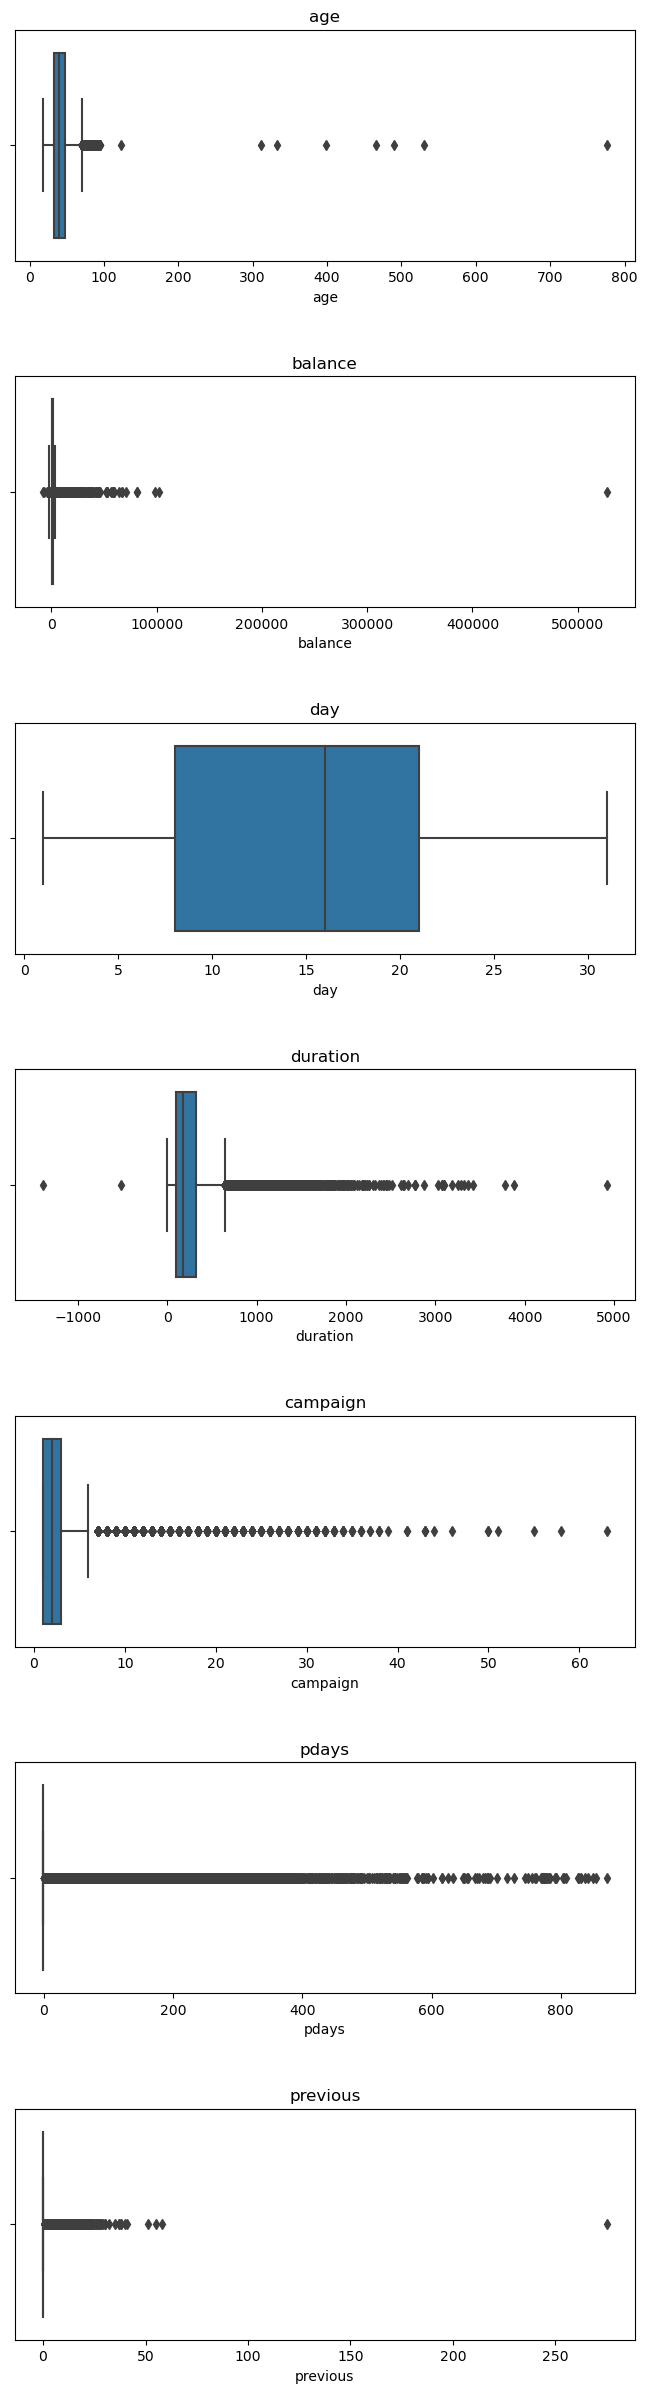

In [283]:
# Generate individual graphs for numerical variables
# are in different ranges

numerical_columns = data.select_dtypes(exclude = object)

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for index, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=data, ax=ax[index])
    ax[index].set_title(column)

**Observations:**
- "age": there are subjects with ages much older than 120 years
- "duration": there are negative values
- "previous": there is an extremely high value (close to 300)

In [284]:
initia_shape, columns = data.shape

# Delete the columns
data = data[data['age'] <= 120]
data = data[data['duration'] > 0]
data = data[data['previous'] <= 100]

end_shape, columns = data.shape
initia_shape - end_shape

14

#### Typographical errors in categorical variables

In a categorical variable, sub-levels such as "unknown" and "UNK" may appear, which for us are equivalent but which for our program would appear different.

These sub-levels must be unified

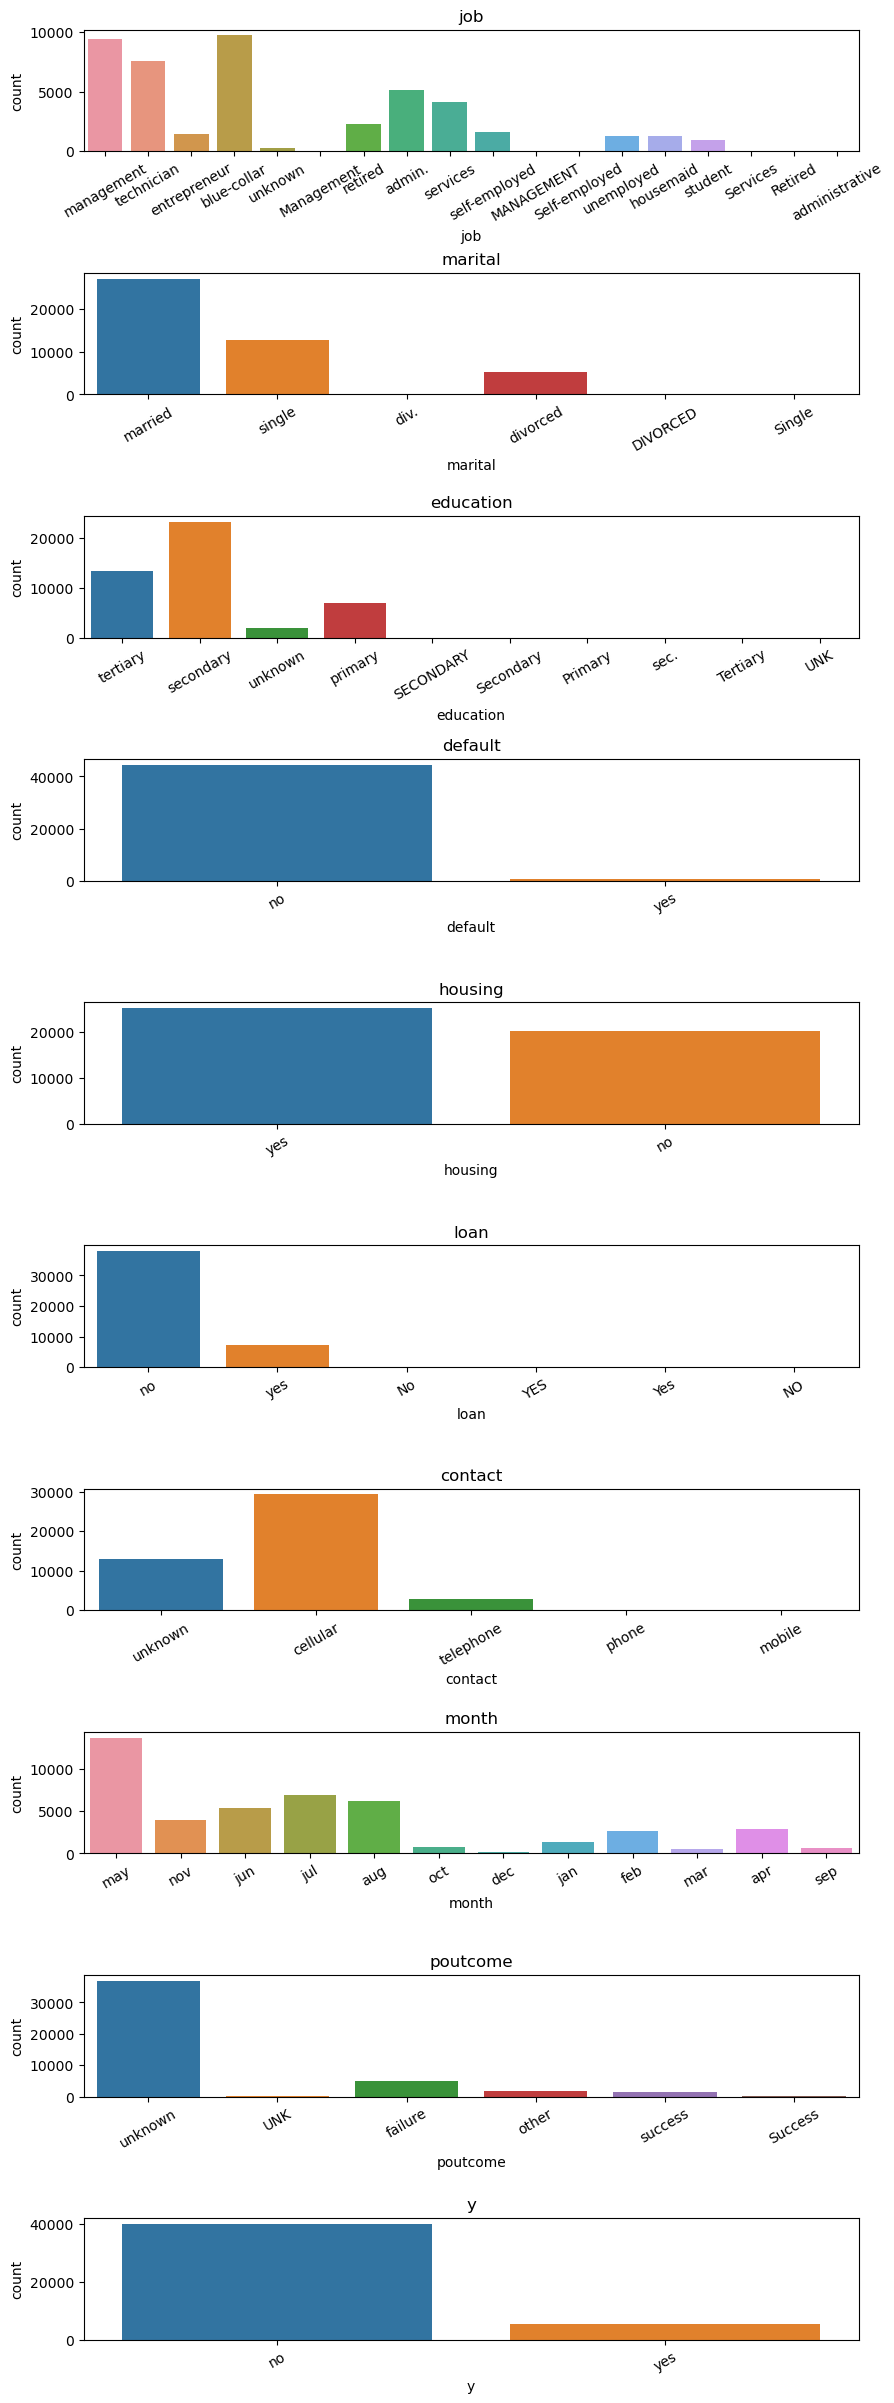

In [285]:
categorical_columns = data.select_dtypes(include = object).columns

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for index, column in enumerate(categorical_columns):
  sns.countplot(x=column, data=data, ax=ax[index])
  ax[index].set_title(column)
  ax[index].set_xticklabels(ax[index].get_xticklabels(),rotation=30)

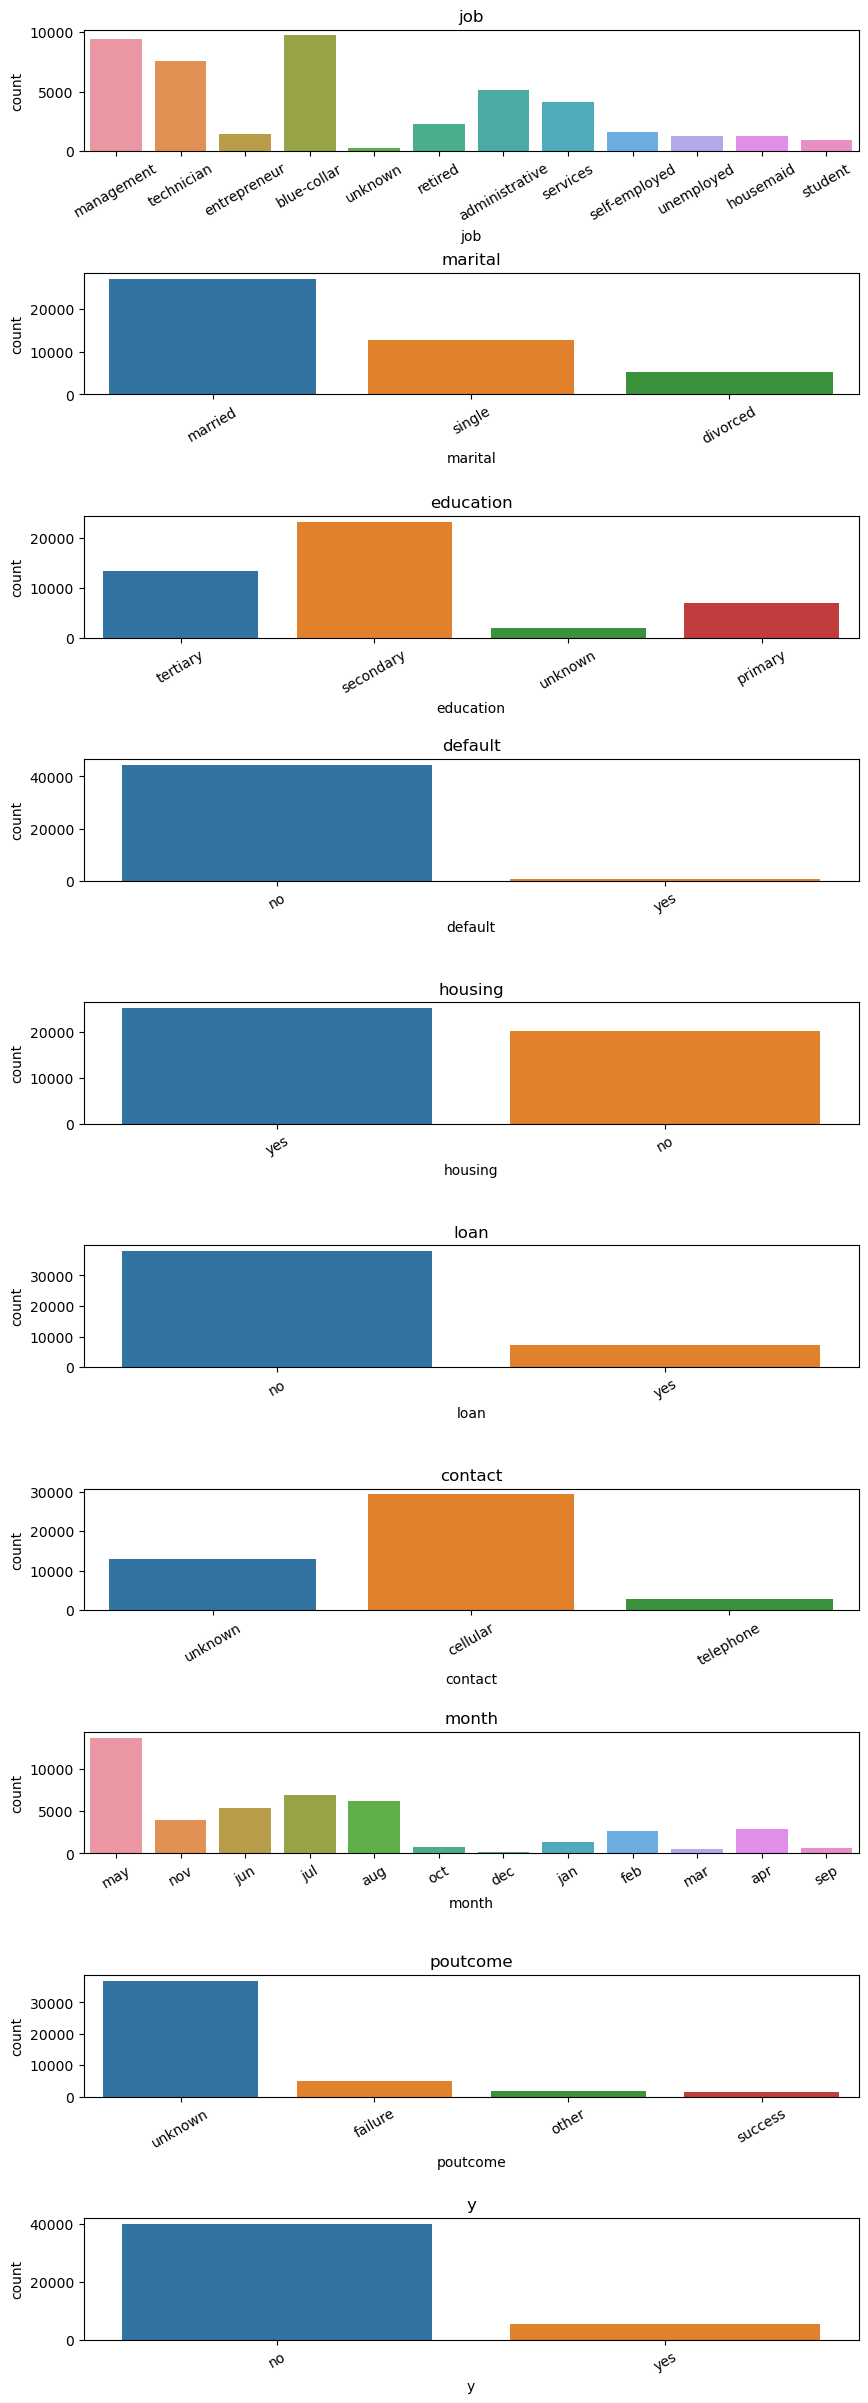

In [286]:
for column in data.columns:
    # Represent in lowercase only if the column is categorical
    if column in categorical_columns:
        data[column] = data[column].str.lower()

# unify data
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
data.loc[data['poutcome']=='unk','poutcome']='unknown'

# And let's generate the graphs again
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categorical_columns):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)